We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [131]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

df = pd.read_csv('airlines_passengers.csv')


Let’s display the first five rows of data

In [132]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [133]:
df.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [175]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [176]:
df.isnull().sum()

Passengers    0
dtype: int64

In [177]:
df.isna().sum()

Passengers    0
dtype: int64

We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [134]:
df['Month']= pd.to_datetime(df['Month'])
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index. 


In [148]:
df.set_index('Month', inplace= True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

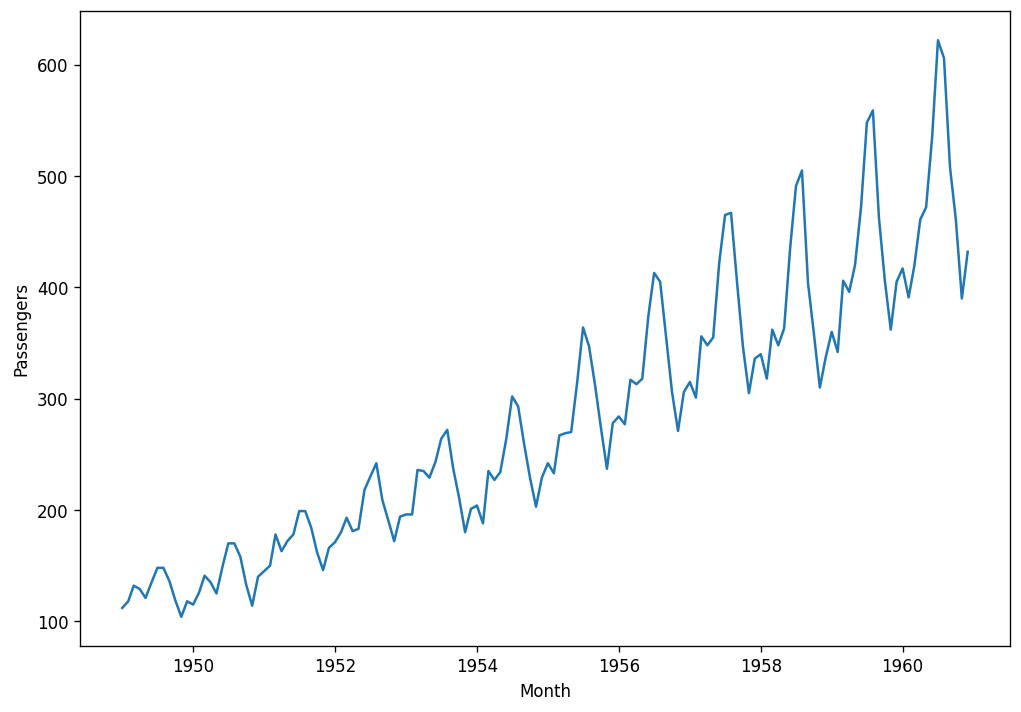

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lineplot(data=df, x='Month', y='Passengers')
plt.show(fig)

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [151]:
from statsmodels.tsa.stattools import adfuller, kpss

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [152]:
# ADF Test
result = adfuller(df['Passengers'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [153]:
results = pd.DataFrame(result)
results

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}"
5,996.692931


Explain the results

In [141]:
# p-value is estremely high (very lose to 1) so we an rejet H0 and conclude that data is not stationnary...

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

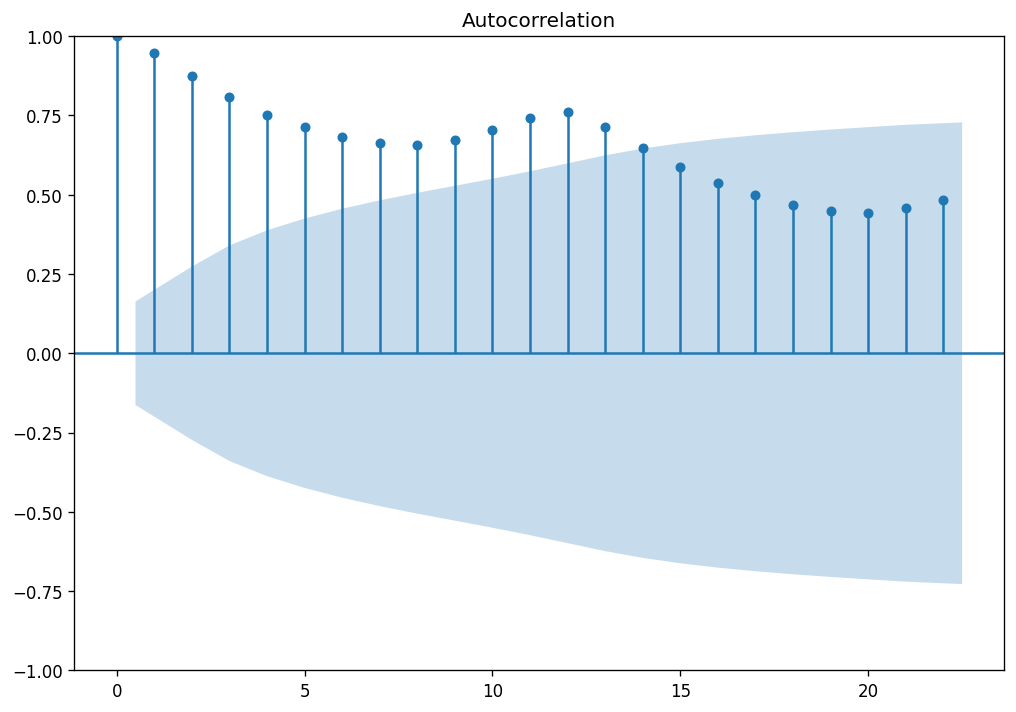

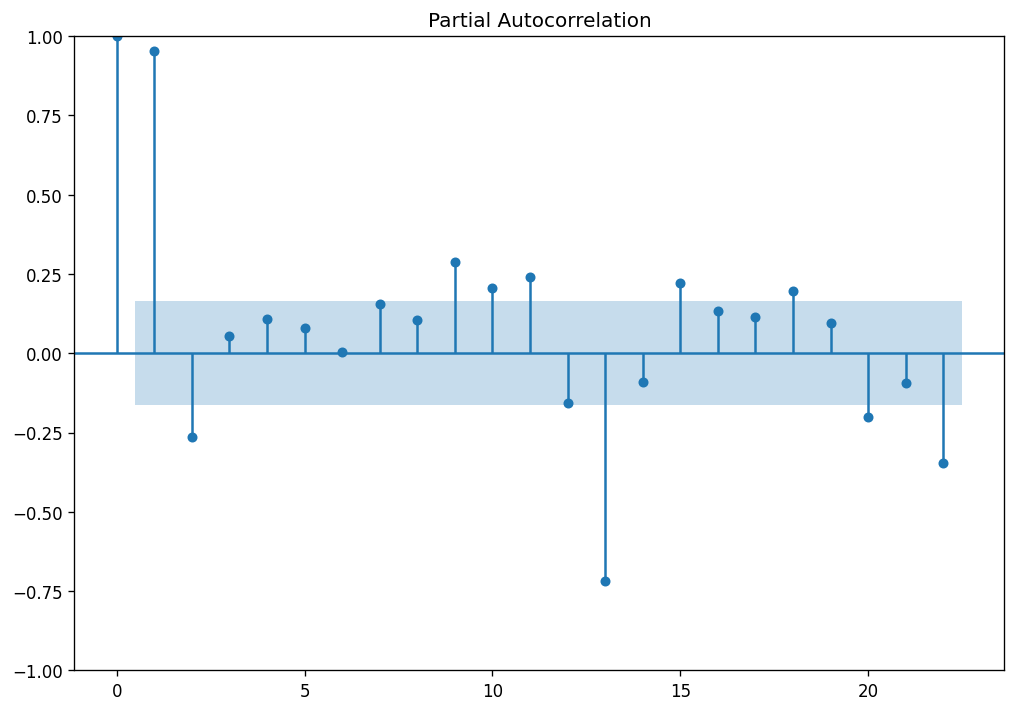

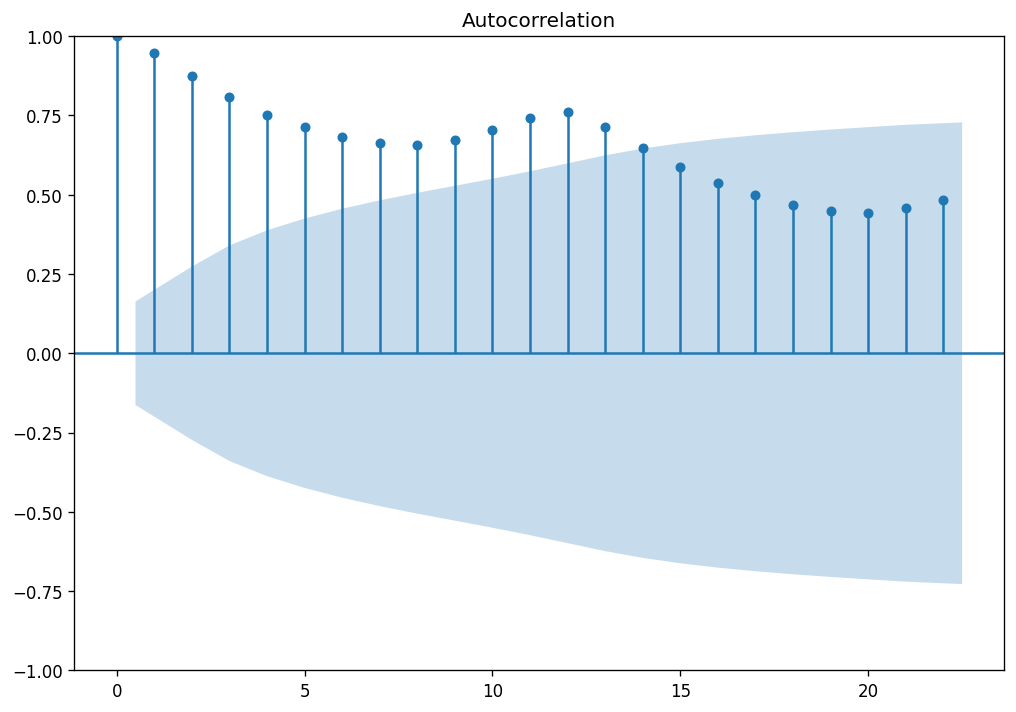

In [154]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(df['Passengers'])
plot_acf(df['Passengers'])

Calculate partial autocorrelation

In [ ]:
#See above !


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


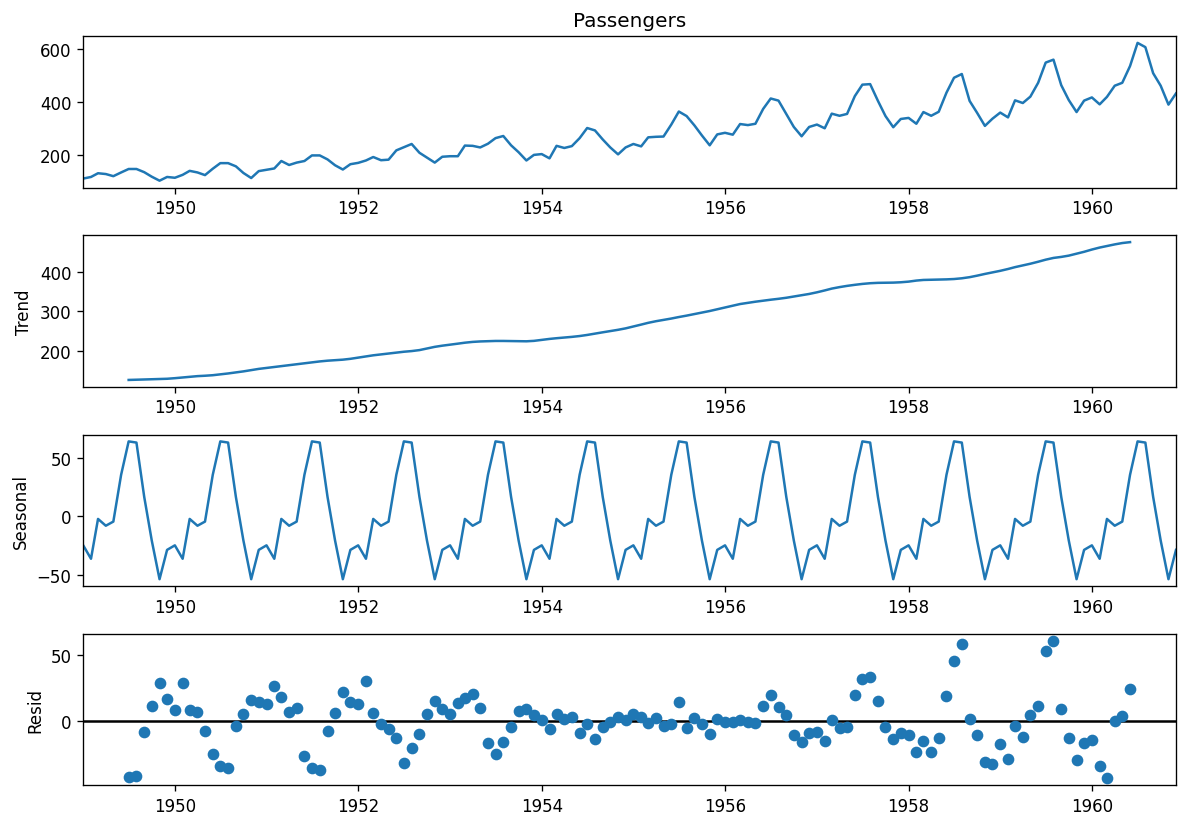

In [156]:
result_add = seasonal_decompose(df['Passengers'], model='additive', period=12)
decompose = result_add.plot()

plt.show()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

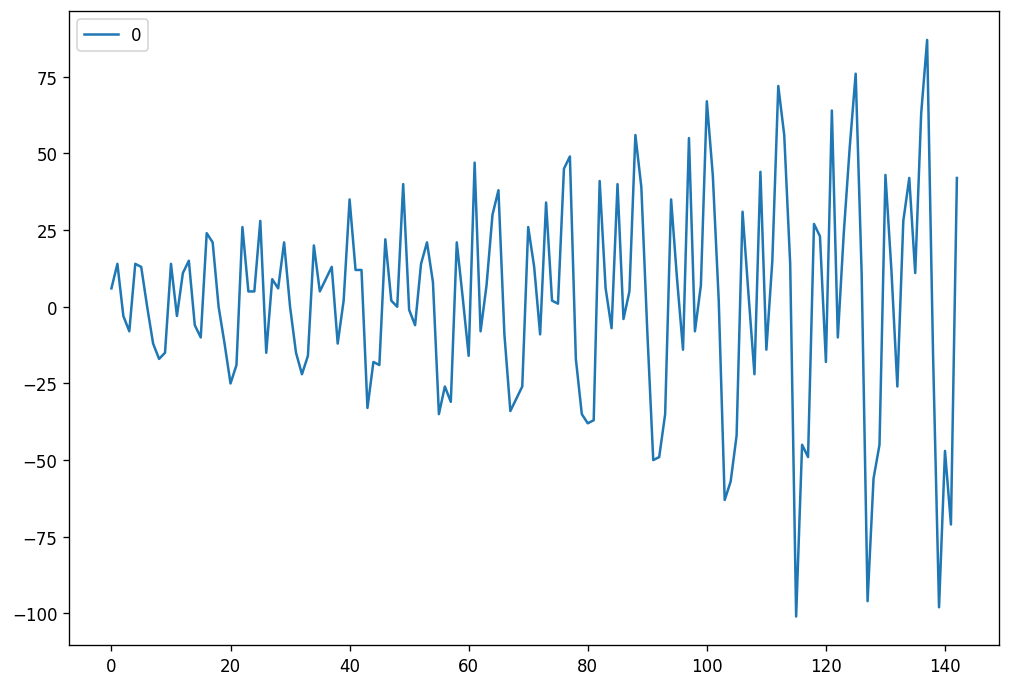

In [157]:
#to make our data stationnary, let's check if we can use differencing...

import numpy as np
import matplotlib.pyplot as plt

diff_df = pd.DataFrame(np.diff(df['Passengers'], n=1))

diff_df.plot()
plt.show()


In [158]:
# ADF Test
result = adfuller(diff_df.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


MA(1)

In [178]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(diff_df, order=(0,0,1))
resultma1 = model.fit()
print(resultma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -696.414
Date:                Tue, 29 Mar 2022   AIC                           1398.827
Time:                        19:21:44   BIC                           1407.716
Sample:                             0   HQIC                          1402.439
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4220      3.735      0.648      0.517      -4.898       9.742
ma.L1          0.4012      0.077      5.202      0.000       0.250       0.552
sigma2       993.2318    107.912      9.204      0.0

Display the output

MA(2)

In [179]:
model = ARIMA(diff_df, order=(0,0,2))
resultma2 = model.fit()
print(resultma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -695.193
Date:                Tue, 29 Mar 2022   AIC                           1398.386
Time:                        19:21:49   BIC                           1410.237
Sample:                             0   HQIC                          1403.201
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4331      2.890      0.842      0.400      -3.230       8.097
ma.L1          0.3735      0.072      5.161      0.000       0.232       0.515
ma.L2         -0.2830      0.061     -4.670      0.0

Display the output

AR(2)

In [180]:
model = ARIMA(diff_df, order=(2,0,0))
resultar2 = model.fit()
print(resultar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -694.988
Date:                Tue, 29 Mar 2022   AIC                           1397.975
Time:                        19:21:52   BIC                           1409.827
Sample:                             0   HQIC                          1402.791
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4075      3.125      0.770      0.441      -3.717       8.532
ar.L1          0.3792      0.088      4.331      0.000       0.208       0.551
ar.L2         -0.2314      0.064     -3.627      0.0

In [128]:
import warnings
from pandas import Series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

ARMA (?,?)

In [181]:
arma22 = ARIMA(diff_df, order = (2,0,2))
resultarma22 = arma22.fit()
print(resultarma22.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -666.022
Date:                Tue, 29 Mar 2022   AIC                           1344.044
Time:                        19:21:57   BIC                           1361.821
Sample:                             0   HQIC                          1351.267
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5318      0.735      3.445      0.001       1.091       3.972
ar.L1          1.6478      0.028     58.899      0.000       1.593       1.703
ar.L2         -0.9094      0.025    -36.756      0.0

ARIMA(?,?)

In [182]:
arima212 = ARIMA(diff_df, order = (2,1,2))
resultarima212 = arima212.fit()
print(resultarima212.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -691.329
Date:                Tue, 29 Mar 2022   AIC                           1392.658
Time:                        19:22:03   BIC                           1407.437
Sample:                             0   HQIC                          1398.664
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4633      0.122     -3.785      0.000      -0.703      -0.223
ar.L2          0.1066      0.116      0.918      0.359      -0.121       0.334
ma.L1         -0.1056     16.089     -0.007      0.9

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [184]:
models = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [resultma1,resultma2,resultar2,resultarma22,resultarima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models)):
    if i != 4:
        r = mean_squared_error(y_true = diff_df, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = df[:143], y_pred = results[i].predict(), squared=False)
        rmse.append(r)
rmse

[31.515783318240192,
 31.216723895524655,
 31.19971626100264,
 25.05766562946392,
 301.6916186899699]

# The 4th model (ARMA22) seems to provide the best result (lowest RMSE)

Calculate AIC

In [185]:
aic = []
for i in range(0, len(models)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a)
aic

[1398.8271098680575,
 1398.3855317914645,
 1397.9751521919977,
 1344.0436576326915,
 1392.658002175227]

# The 4th model (ARMA22) seems to provide the best result (lowest AIC)